<a href="https://colab.research.google.com/github/Pmskabir1234/Machine_Learning/blob/main/Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical


In [6]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
X = df.drop(columns=['Id','Species'],axis=1)
y = df['Species']

encoder = LabelEncoder()    #to deonote classes by integers
y = encoder.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###Perceptron

In [25]:
percep = Perceptron(max_iter=1000, random_state=42)
percep.fit(X_train,y_train)
y_pred = percep.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.88      0.70      0.78        10
           2       0.90      0.90      0.90        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.86        30
weighted avg       0.87      0.87      0.86        30



In [42]:
y_train_cat = to_categorical(y_train,num_classes=3).astype(int) #to one hot encode isntead of just a single number
y_test_cat = to_categorical(y_test,num_classes=3).astype(int)

model = Sequential([
    Dense(16,input_dim=4,activation='relu'),
    Dense(8,activation='relu'),
    Dense(3,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,y_train_cat,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 8,
    verbose = 1
)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3373 - loss: 1.1816 - val_accuracy: 0.5417 - val_loss: 1.0653
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4747 - loss: 1.0521 - val_accuracy: 0.8333 - val_loss: 0.9547
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7837 - loss: 0.9286 - val_accuracy: 0.7917 - val_loss: 0.8649
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8463 - loss: 0.8299 - val_accuracy: 0.6667 - val_loss: 0.7919
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.7805 - val_accuracy: 0.6667 - val_loss: 0.7306
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8238 - loss: 0.7157 - val_accuracy: 0.6667 - val_loss: 0.6776
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8316 - loss: 0.6375 - val_accuracy: 0.6667 - val_loss: 0.6365
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8334 - loss: 0.5959 - val_accuracy: 0.7083 - 

In [40]:
loss,acc = model.evaluate(X_test,y_test_cat)
print(acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9333 - loss: 0.1911
0.9333333373069763


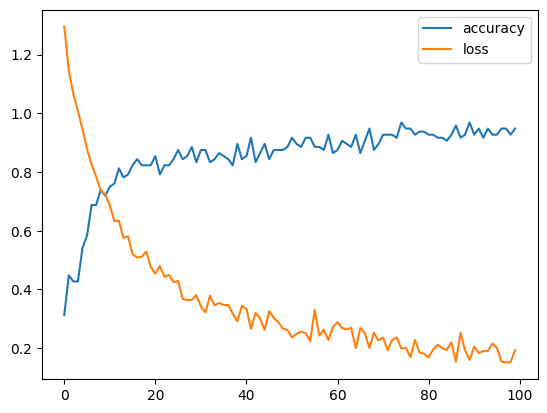

In [41]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()